# Project Title :Stock Price of Famous Companies

Author: Xuanru Li, xuanrul@uci.edu

Course Project, UC Irvine, Math 10, S22

## Introduction

* my dataset is dataset of all the US stock within 5 years but it's a little big. I make three subset which including three stocks in the stock market, which are AAL, Facebook and Apple. In this project I mainly focs on visualization of stock price and make prediction by using MachineLearning.  
* There are four parts of this project, first two parts are prediction using linear regression and polynomial regression. Last two parts are visualization by using Plotly and Altair in terms of history stock price of AAL and comparisons between Apple and Facebook

## Predict close price of AAL stock



Firstly, read the dataset and clean the data,becasue the dataset is too large and altair only shows max row of 5000, here I choose one stock(AAL) sample from original dataset 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt

In [ ]:
df= pd.read_csv("all_stocks_5yr.csv")

In [ ]:
df=df.dropna().copy()
df=df[df["Name"]=="AAL"].copy()
df.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


we can see now we drop the missing value and get the ideal AAL dataframe

Secondly, I want to use open, high and low price to predict the close price of a stock

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

let us visualize the close price history first 

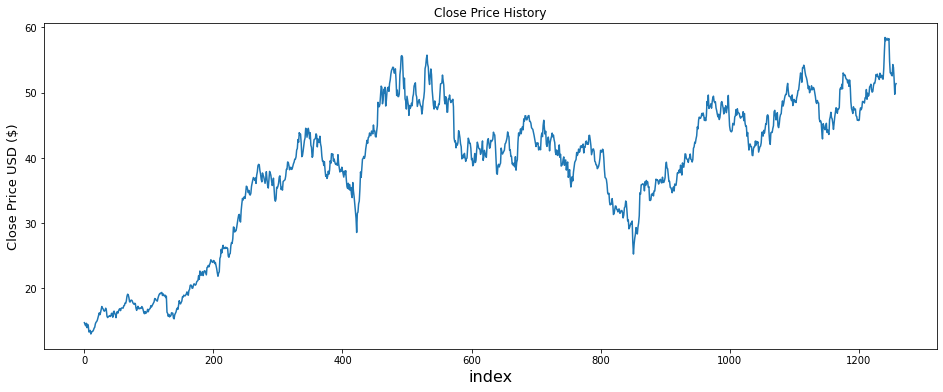

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('index', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=13)
plt.show()

In [ ]:
reg = LinearRegression()
cols=["open","high","low"]
X_train,X_test,y_train,y_test = train_test_split(df[cols],df["close"],train_size=0.3,random_state=0)


I use linearegression of train set to predict test set here

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
df_sub=X_test
df_sub["Pred"]=reg.predict(X_test)
df_sub["True"]=y_test


In [ ]:
df_sub.reset_index()

,index,open,high,low,Pred,True
0,5,13.93,14.6100,13.93,14.474599,14.500
1,494,53.99,54.5200,52.54,53.212523,52.695
2,52,16.55,16.7300,16.19,16.399749,16.220
3,986,46.01,47.3400,45.78,46.869246,47.080
4,186,22.60,23.9000,22.57,23.612153,22.710
...,...,...,...,...,...,...
877,357,42.91,43.2300,42.52,42.831180,42.880
878,353,41.72,41.7200,39.92,40.241059,40.100
879,788,40.90,41.4295,40.77,41.201474,41.350
880,153,18.68,18.8000,18.47,18.602006,18.680


show how the prediction works

In [ ]:
print (f"the predictive closing price for 82.22(open),82.22(high),79.52(low) is {82.22*reg.coef_[0]+82.22*reg.coef_[1]+79.52*reg.coef_[2]+reg.intercept_}")

the predictive closing price for 82.22(open),82.22(high),79.52(low) is 79.9853408195805


we can see here actually the prediction is accurate becasue the difference of value between close price and open price is not too much since it's just within one day, therefore, I need a new angle for direction

## Predict close price based on opening price

this part I want to switch a prediction method and I decide to use opening price to predict the close price and compared with true price to compute the error

In [ ]:
df["year"]= pd.to_datetime(df["date"]).dt.year

In [ ]:
max_deg=5
sub_col=[]
for i in range(1,max_deg+1):
    c=f"open{i}"
    sub_col.append(c)
    df[c]=df["open"]**i
df

,date,open,high,low,close,volume,Name,year,open1,open2,open3,open4,open5
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013,15.07,227.1049,3422.470843,5.157664e+04,7.772599e+05
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,14.89,221.7121,3301.293169,4.915626e+04,7.319366e+05
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,14.45,208.8025,3017.196125,4.359848e+04,6.299981e+05
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,14.30,204.4900,2924.207000,4.181616e+04,5.979711e+05
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,14.94,223.2036,3334.661784,4.981985e+04,7.443085e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL,2018,54.00,2916.0000,157464.000000,8.503056e+06,4.591650e+08
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL,2018,53.49,2861.1801,153044.523549,8.186352e+06,4.378879e+08
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL,2018,51.99,2702.9601,140526.895599,7.305993e+06,3.798386e+08
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL,2018,49.32,2432.4624,119969.045568,5.916873e+06,2.918202e+08


here I set max degree into 5 below for polynomial regression and a "year" column

In [ ]:

X_train2,X_test2,y_train2,y_test2 = train_test_split(df[sub_col],df["close"],train_size=0.3,random_state=0)

In [ ]:
mse_train_dict = {}

for i in range(1,max_deg+1):
    sub = sub_col[:i]
    reg = LinearRegression()
    reg.fit(X_train2[sub], y_train2)
    mse_train_dict[i] = mean_squared_error(reg.predict(X_train2[sub]), y_train2)
mse_train_dict

{1: 0.613737790029641,
 2: 0.6109051382778017,
 3: 0.6109024377985044,
 4: 0.6106427682807114,
 5: 0.6106371158209921}

* it looks like pretty similiar becasue in original data, the opening price and the closing price difference are not too much, here we just check 3th to 6th digit since the first two digit are the same.We can see the error keeps going lower so it's a not bad sign

In [ ]:
mse_test_dict = {}

for i in range(1,max_deg+1):
    sub = sub_col[:i]
    reg = LinearRegression()
    reg.fit(X_train2[sub], y_train2)
    mse_test_dict[i] = mean_squared_error(reg.predict(X_test2[sub]), y_test2)
mse_test_dict

{1: 0.5299597972949177,
 2: 0.5272501941771051,
 3: 0.5272560447897813,
 4: 0.5268082561653469,
 5: 0.5268494986878971}

* here we also keep just 3th to 6th digit position and we can see that after 4th degree, the error goes up a little bit, I assume that 4th degree is relatively perefect but since the overall error is small so I'm not going to add degree and count error here
* Overall the relationship between overfitting and underfitting is now obvious here because the low difference of values, but the structure of prediction is ok and it can be effectively used in other datasets.

## See stock price by selection of period of time

Here I want to show the detailed stock market when selecting certain part of stock market. The whole dataset of AAL is 5 years, but what if I only want to look certain period of stock price given certain year?

In [ ]:
df2014=df.loc[df["year"]==2014]

here I just want to show 2014 price because I don't want the graph of x label to be too messy

In [ ]:
brush = alt.selection_interval(encodings=["x"])

In [ ]:
c = alt.Chart(df2014).mark_line().encode(
    y='close',
    color=alt.Color ("Name",scale = alt.Scale(scheme = "category20"))
).properties(
    width=600,
    height=100
).add_selection(
    brush
).encode(x='date') 

In [ ]:
c_detail = alt.Chart(df2014).mark_line().encode(
    y=alt.Y('close',scale=alt.Scale(zero=False)),
    color=alt.Color ("Name",scale = alt.Scale(scheme = "category20"))
).properties(
    width=600,
    height=400
).transform_filter(
    brush
).encode(x='date') 

In [ ]:
c_detail&c

alt.VConcatChart(...)

## Comparison between two stocks

Here I want to see two companies' history stock price and try to analyze the better one by comparison

In [ ]:
alldata=pd.read_csv("all_stocks_5yr.csv")
alldata["date"]=pd.to_datetime(alldata["date"])

In [ ]:
alldata.Name.unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

we can see there are many stocks in the stock market, here we choose two famous one, facebook and apple

In [ ]:
fb=alldata[alldata["Name"]=="FB"]
apl=alldata[alldata["Name"]=="AAPL"]
twostk = fb[['date','close']].merge(apl[['date','close']], on = 'date')
twostk.head()

,date,close_x,close_y
0,2013-02-08,28.5450,67.8542
1,2013-02-11,28.2600,68.5614
2,2013-02-12,27.3700,66.8428
3,2013-02-13,27.9075,66.7156
4,2013-02-14,28.5000,66.6556


combine and merge Apple and Facebook stock together, but it now enough and clear for us to see the relationship of them based on time series

In [ ]:

import plotly.graph_objs as go



In [ ]:
trace0 = go.Scatter(x=apl.date, y=apl.close, name='Apple')
trace1 = go.Scatter(x=fb.date, y=fb.close, name='Facebook')

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
fig = go.Figure()
fig.add_trace(trace0)
fig.add_trace(trace1)
fig.update_layout(
    title={'text' :"Apple vs Facebook Stock Price"})


fig.show()

We can see here at the 2013, Facebook actually had lower price than apple, but after 2016, Facebook suppressed Apple in terms of price and hold the lead for most of following lwing time

However, we cannot say Facebook has larger scale or larger profitability than Apple, because I think the reason why Apple cannot beat Facebook in terms of stock price is because Apple, as a giant company, has more stock shares so it makes the individual stock share price not too high

## Summary

In this project I try to used what I learned in math10 about Pandas to find sub dataset and re-incorporate dataset, and use Machinelearning to predict the close price by (open,high low) price and polynomial open price and also compute the error. Also I use the Altair bursh and transform to plot a flexible graph so that I can see the detailed close price for a certain period. Last, I use Plotly as extra topic to plot the history AAL price and compare two famous companies : Apple and Facebook 

## References

* What is the source of your dataset(s)?

My source downloaded from Kaggle and the name is S&P 500 stock data https://www.kaggle.com/datasets/camnugent/sandp500/code?datasetId=1908&sortBy=voteCount

* Were any portions of the code or ideas taken from another source?  List those sources here and say how they were used.
the idea of comparing two famous stocks based on time series is adapted from 
https://www.kaggle.com/code/hakkisimsek/plotly-tutorial-3   

The codes about Plotly graphing including go.scatter and matplotlib are learned from  
https://plotly.com/python/line-charts/ 

The idea of predicting close price is adapted from  
https://christopherdavisuci.github.io/UCI-Math-10-W22/Proj/StudentProjects/YufeiRen.html 


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1093d634-f1d2-43c3-9ca6-7faf0ed2e82b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>